# Calculate IST (Instantaneous Shot Threat)

## Imports

In [1]:
import numpy as np
import pandas as pd

In [10]:
import sys
from pathlib import Path
# Add project root to path for imports
ROOT = Path.cwd().parent  
sys.path.append(str(ROOT))

from src.data_io.maps import load_maps_npz
from src.viz.court import plot_player_map_on_court
from src.utils.players import maps_npz_player_dict
from src.features.ist import compute_ist_from_maps, add_ist_column


ImportError: cannot import name 'add_ist_column' from 'src.features.ist' (/Users/cadenp/Documents/GitHub/DSC180B_FinalProject/src/features/ist.py)

## Load Data

In [3]:
maps, meta = load_maps_npz("../data/processed/maps_1ft.npz")
shots_df = pd.read_csv("../data/processed/def_variables.csv")

In [4]:
shots_df['x_ft'] = shots_df['LOC_X'] / 12.0
shots_df['y_ft'] = shots_df['LOC_Y'] / 12.0
print(shots_df.shape)
shots_df.columns

(95, 33)


Index(['GAME_ID', 'GAME_EVENT_ID', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'SHOT_MADE_FLAG', 'LOC_X', 'LOC_Y', 'PLAYER_ID',
       'TEAM_ID', 'xFG_base', 'xPPS_base', 'game_clock', 'close_def_id',
       'close_def_dist_release', 'close_def_dist_min', 'close_def_dist_mean',
       'close_def_closing_speed_mean', 'close_def_closing_speed_min',
       'def_speed_mean', 'def_speed_max', 'def_accel_mean', 'def_accel_max',
       'shooter_speed_mean', 'shooter_speed_max', 'shooter_accel_mean',
       'shooter_accel_max', 'window_frames', 'game_clock_release',
       'shot_clock_release', 'release_idx', 'x_ft', 'y_ft'],
      dtype='object')

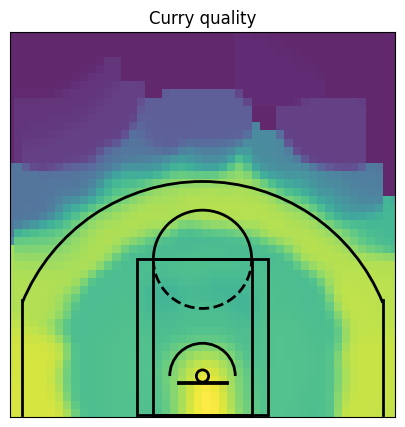

In [5]:
pid = 201939
pid2row = {int(p): i for i, p in enumerate(maps["player_ids"])}
plot_player_map_on_court(maps_npz_player_dict(maps, pid2row, 201939),
                         key="quality", title="Curry quality")

In [6]:
pid2row = {int(p): i for i, p in enumerate(maps["player_ids"])}
dist_to_ball = 0.0
row = shots_df.iloc[0]

In [8]:
res = compute_ist_from_maps(
    pid=int(row["PLAYER_ID"]),
    x=float(row["x_ft"]),
    y=float(row["y_ft"]),
    maps_npz=maps,
    pid2row=pid2row,
    dmin=float(row["close_def_dist_mean"]),
    closing_speed=float(row["close_def_closing_speed_mean"]),
    speed=float(row["shooter_speed_mean"]),
    accel=float(row["shooter_accel_mean"]),
    closing_convention="deriv",   # <-- THIS is the key
    include_ball=False
)

res["IST"], res

(0.05425215360061893,
 {'IST': 0.05425215360061893,
  'Q': 0.9731922149658203,
  'O': 0.7616031843127996,
  'S': 0.07319638037341233,
  'B': 1.0,
  'reason': 'ok'})

In [ ]:
shots_with_ist = add_ist_column(shots_df, maps, pid2row)